# Name:- Pratik Zodpe
# PRN:- 240340143005

In [1]:
###-----------------
### Import Libraries
###-----------------

from helper import *
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from typing import Literal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import tensorflow as tf
from helper import fn_plot_tf_hist, fn_plot_confusion_matrix


%matplotlib inline

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
###----------------------
### Some basic parameters
###----------------------

inpDir = os.path.join( '..', 'input') # location where input data is stored
outDir = '../output' # location to store outputs
subDir = 'flower_photos' # location of the images
modelDir = 'Neural Network' # location to save model files
valDir = 'valid_flowers' # location related to this dataset
altName = 'students_base_flowers' # Model file name for this alternative

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
tf.random.set_seed(RANDOM_STATE)


EPOCHS = 200   # number of cycles to run
ALPHA = 0.01
BATCH_SIZE = 32
TEST_SIZE = 0.2
IMG_HEIGHT = 225
IMG_WIDTH = 225


# Transformations
# flipping
FLIP_MODE = "horizontal_and_vertical"
# Rotation
ROTATION_FACTOR = (-0.1, 0.1)
# filling mode
FILL_MODE = 'nearest'


## Early Stopping
ES_PATIENCE = 20 # if performance does not improve stop
# Learning rates
LR_PATIENCE = 10 # if performace is not improving reduce alpha
LR_FACTOR = 0.5 # rate of reduction of alpha
PATIENCE = 20

# Set parameters for decoration of plots
params = {'legend.fontsize' : 'large',
          'figure.figsize'  : (15,8),
          'axes.labelsize'  : 'x-large',
          'axes.titlesize'  :'x-large',
          'xtick.labelsize' :'large',
          'ytick.labelsize' :'large',
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params) # update rcParams

In [3]:
###------------------
### Memory Management
###------------------

# physical_devices = tf.config.list_physical_devices('GPU')

# if len(physical_devices) > 0:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [4]:
def fn_plot_label(tr_ds,ts_ds):
  plt.figure(figsize = (15,5))

  plt.subplot(1,2,1)

  train_labels = tf.concat([lbl for img, lbl in tr_ds],axis = 0).numpy()

  unique,_,counts=tf.unique_with_counts(train_labels)

  plt.bar(range(len(unique)),counts ,align='center',color = 'DarkBlue')

  plt.xticks(range(len(unique)),class_names)

  plt.title('Training Set')

  plt.subplot(1,2,2)

  test_labels = tf.concat([lbl for img, lbl in ts_ds],axis = 0).numpy()

  unique,_,counts = tf.unique_with_counts(test_labels)

  plt.bar(range(len(unique)),counts ,align='center',color = 'Orange')

  plt.xticks(range(len(unique)),class_names)

  plt.title('Test Set')







In [5]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                  fname='flower_photos',
                                  untar=True)
data_dir = pathlib.Path(data_dir)


In [6]:
data_dir

WindowsPath('C:/Users/duasp/.keras/datasets/flower_photos')

In [7]:
# list content of data_dir
os.listdir(data_dir)

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=TEST_SIZE,
    subset='training',
    seed= RANDOM_STATE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=TEST_SIZE,
    subset='validation',
    seed= RANDOM_STATE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = train_ds.class_names
num_classes = len(class_names)
print('total ', num_classes, class_names)

total  5 ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


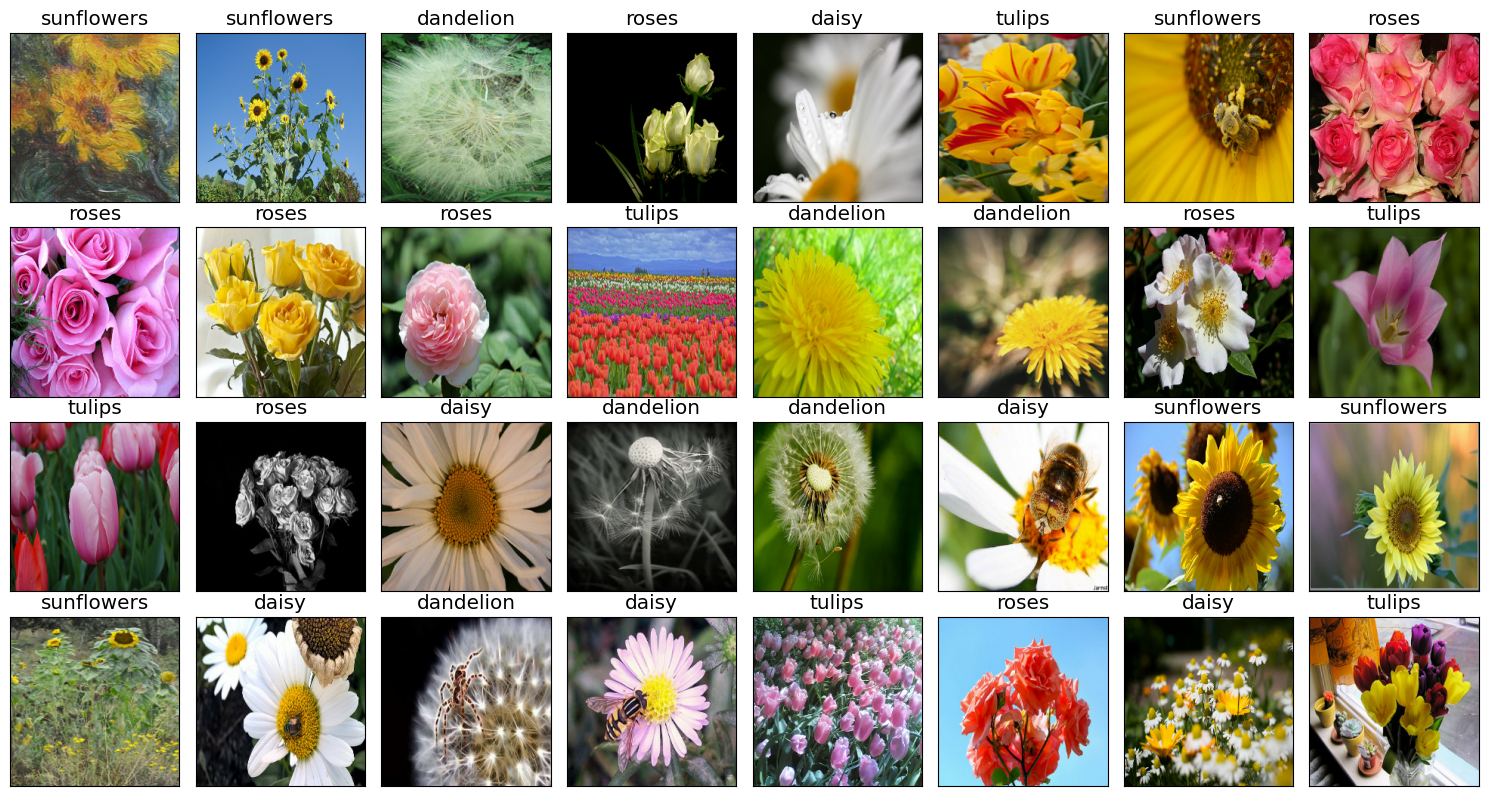

In [10]:
# set figure size
fig = plt.figure()  # figure size in inches with default params

# Adjust the subplot layout parameters.
fig.subplots_adjust(left=0., # as a fraction of the figure width
                    right=1., # use full width, as a fraction of the figure width
                    bottom=0., # as a fraction of the figure height
                    top=1., # as a fraction of the figure height
                    hspace=0.05, # as a fraction of the average Axes height
                    wspace=0.05) # width of the padding between subplots

# take one batch of the dataset
for images, labels in train_ds.take(1):

    # iterate through the batch
    for i in range(BATCH_SIZE):

        # add a subplot
        ax = fig.add_subplot( BATCH_SIZE//8, 8, (i+1), xticks=[], yticks=[]) # add a subplot to the figure

        # image_size may have converted these images to float
        ax.imshow(images[i].numpy().astype("uint8"))

        # display class in the title
        ax.set_title(class_names[labels[i]])

# fit the subplot(s) in to the figure area
plt.tight_layout()

# display all open images
plt.show()

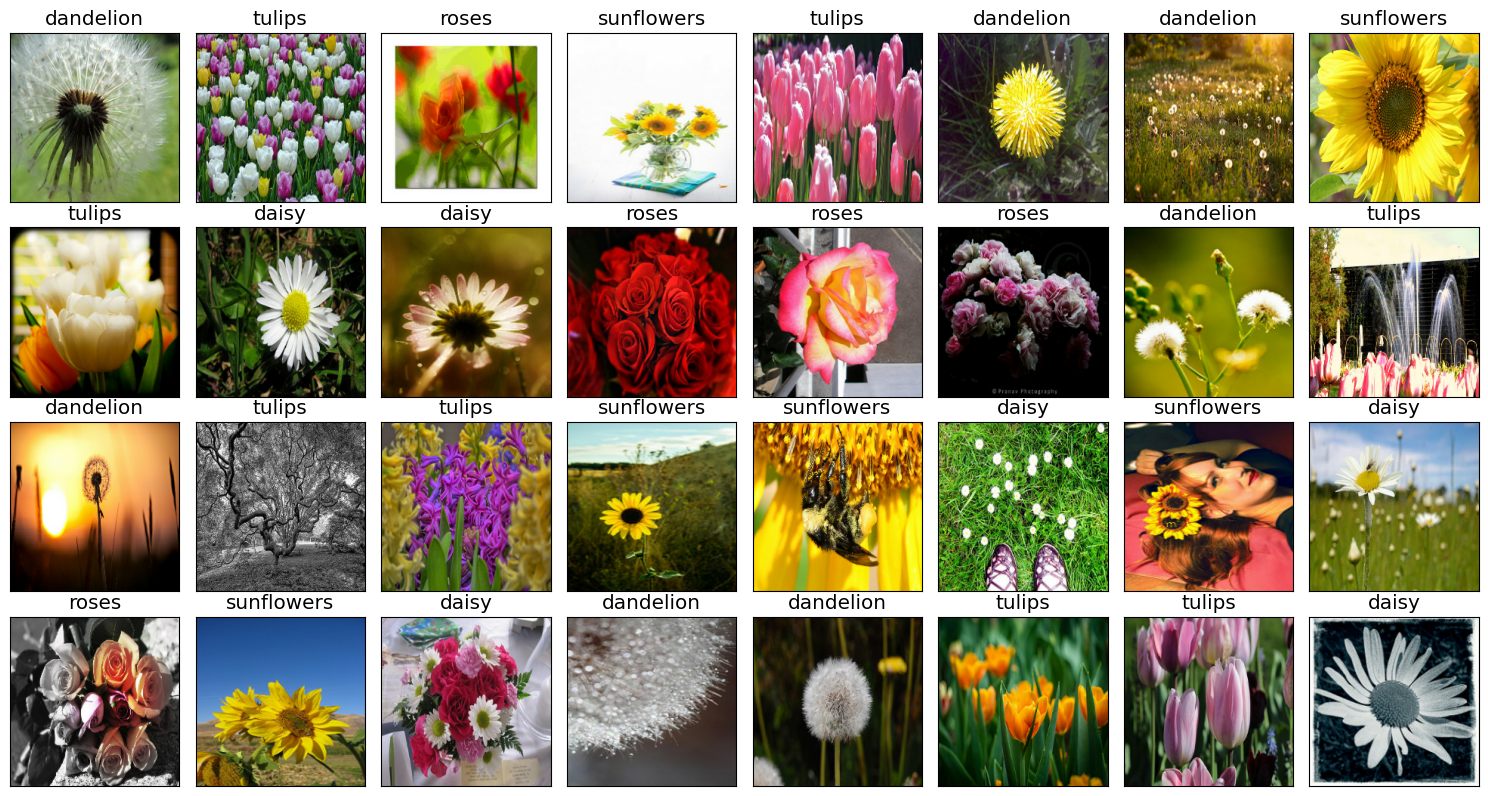

In [11]:
# set figure size
fig = plt.figure()  # figure size in inches with default params

# Adjust the subplot layout parameters.
fig.subplots_adjust(left=0., # as a fraction of the figure width
                    right=1., # use full width, as a fraction of the figure width
                    bottom=0., # as a fraction of the figure height
                    top=1., # as a fraction of the figure height
                    hspace=0.05, # as a fraction of the average Axes height
                    wspace=0.05) # width of the padding between subplots

# take one batch of the dataset
for images, labels in test_ds.take(1):

    # iterate through the batch
    for i in range(BATCH_SIZE):

        # add a subplot
        ax = fig.add_subplot( BATCH_SIZE//8, 8, (i+1), xticks=[], yticks=[]) # add a subplot to the figure

        # image_size may have converted these images to float
        ax.imshow(images[i].numpy().astype("uint8"))

        # display class in the title
        ax.set_title(class_names[labels[i]])

# fit the subplot(s) in to the figure area
plt.tight_layout()

# display all open images
plt.show()

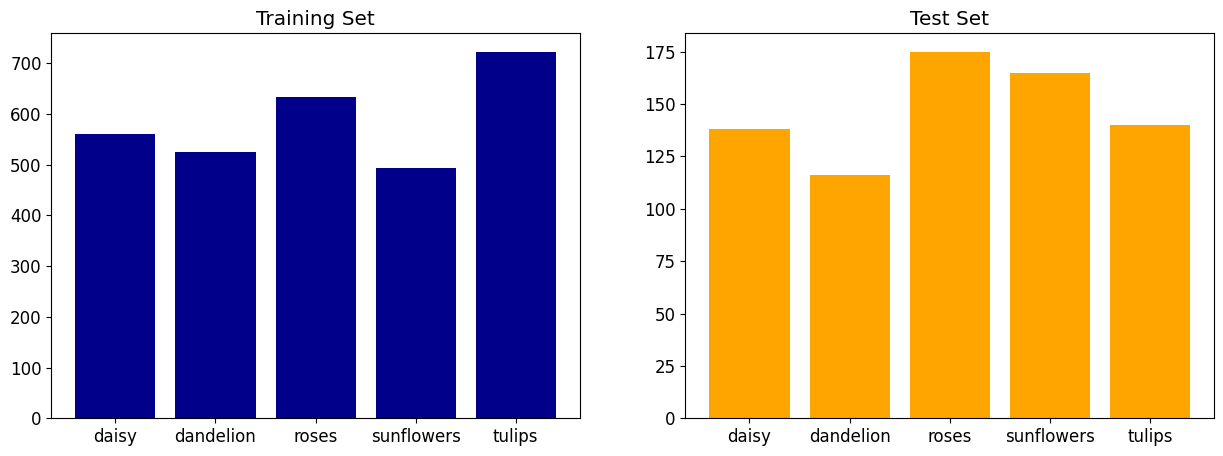

In [12]:
# how many examples in each of the class

fn_plot_label(train_ds, test_ds)


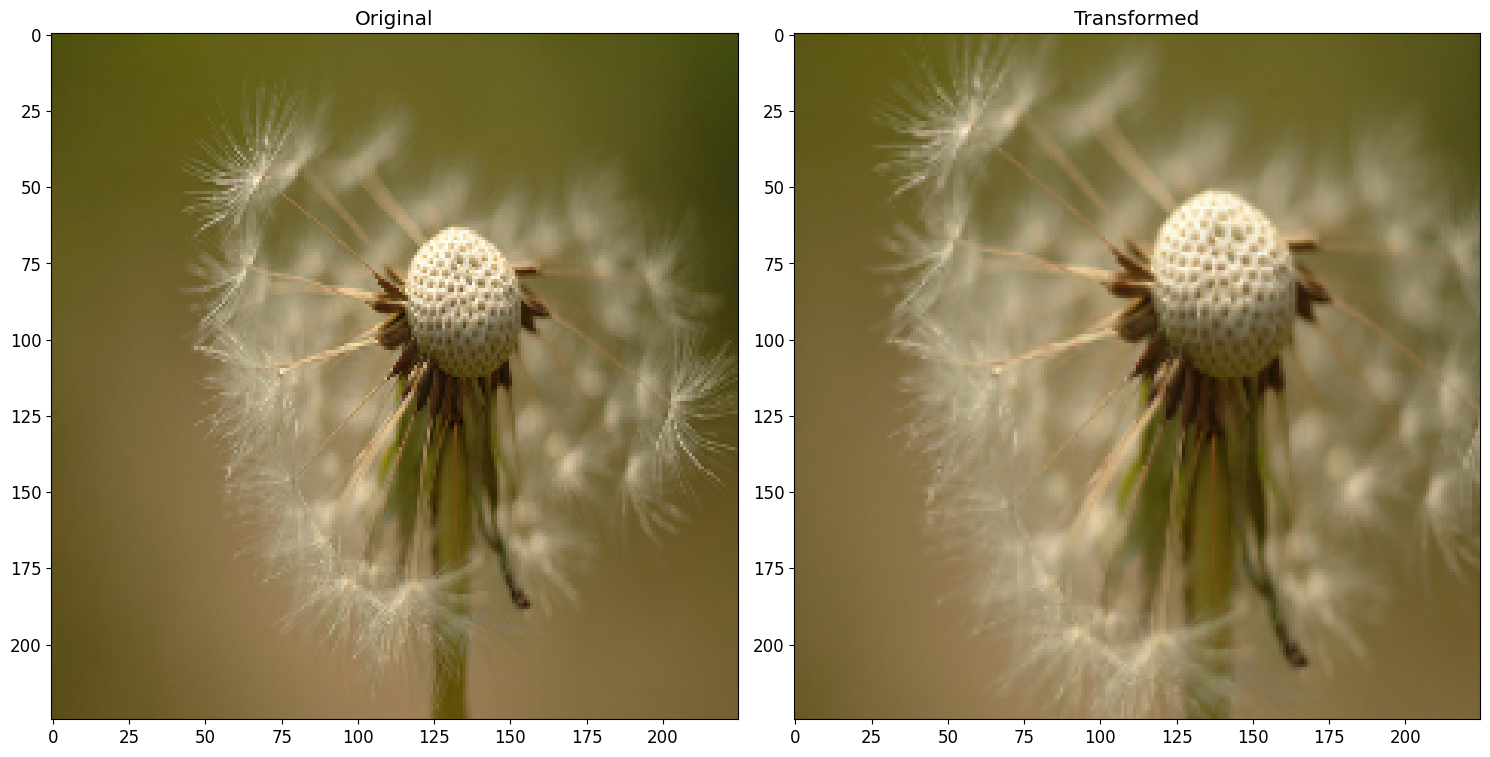

In [13]:
layer =  tf.keras.layers.RandomZoom(height_factor=(-0.2,-0.2), width_factor=(-0.2,-0.2))
plt.figure()
img_num = 3
for images, labels in train_ds.take(1):
   out_images = layer(images)
   plt.subplot(1, 2, 1)
   plt.title('Original')

   plt.imshow(images[img_num].numpy().astype("uint8"))
   plt.subplot(1, 2, 2)
   plt.title('Transformed')
   plt.imshow(out_images[img_num].numpy().astype("uint8"))
plt.tight_layout()
plt.show()

In [14]:
train_ds = train_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

In [15]:
# def build_model():
dor1 = 0.1
dor2 = 0.18
dor3 = 0.28
dor4 = 0.37
dor5 = 0.46
dor6 = 0.54
dor7 = 0.62
l2 = tf.keras.regularizers.L2(0.001)
krnl_init = tf.keras.initializers.GlorotUniform(seed = RANDOM_STATE)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Rescaling(1./255.))

# Data Augumentation

#model.add(tf.keras.layers.RandomFlip(mode = FLIP_MODE, seed = RANDOM_STATE)),

#model.add(tf.keras.layers.RandomRotation(ROTATION_FACTOR, fill_mode = FILL_MODE, seed = RANDOM_STATE)),

model.add(tf.keras.layers.RandomCrop(190, 190, seed = RANDOM_STATE))

####set1####
#cov 1
model.add(tf.keras.layers.Conv2D(8,(3,3),kernel_regularizer = l2)) # 188 X 188
#model.add(tf.keras.layers.BatchNormalization()) # bn layer
model.add(tf.keras.layers.Activation('leaky_relu'))# activation layer
model.add(tf.keras.layers.MaxPool2D((2,2)))  # output shape = 94,94,8
model.add(tf.keras.layers.Dropout(dor1))
#maxpool 1


####set2####
#cov 2
model.add(tf.keras.layers.Conv2D(16,(3,3),kernel_regularizer = l2))  # 92x92x16
#model.add(tf.keras.layers.BatchNormalization()) # bn layer
model.add(tf.keras.layers.Activation('leaky_relu'))# activation layer
#maxpool 2
model.add(tf.keras.layers.MaxPool2D((2,2)))  #pool_size=(2, 2),strides=None,padding='same'  #6x6x64 filter is 64
model.add(tf.keras.layers.Dropout(dor2))


####set3####
#cov 3
model.add(tf.keras.layers.Conv2D(32,(3,3),kernel_regularizer = l2)) ###44 X 44X32
#model.add(tf.keras.layers.BatchNormalization()) # bn layer
model.add(tf.keras.layers.Activation('leaky_relu'))# activation layer
model.add(tf.keras.layers.MaxPool2D((2,2))) # output = 22,22,32
model.add(tf.keras.layers.Dropout(dor3))

##3head###

model.add(tf.keras.layers.Conv2D(64,(3,3),kernel_regularizer = l2)) ###20 X 20 X64
#model.add(tf.keras.layers.BatchNormalization()) # bn layer
model.add(tf.keras.layers.Activation('leaky_relu'))# activation layer
model.add(tf.keras.layers.MaxPool2D((2,2))) # output = 10,10,64
model.add(tf.keras.layers.Dropout(dor4))


model.add(tf.keras.layers.Conv2D(128,(3,3),kernel_regularizer = l2)) ###8 X 8 128
#model.add(tf.keras.layers.BatchNormalization()) # bn layer
model.add(tf.keras.layers.Activation('leaky_relu'))# activation layer
model.add(tf.keras.layers.MaxPool2D((2,2))) # output = 4,4,128
model.add(tf.keras.layers.Dropout(dor5))


model.add(tf.keras.layers.Conv2D(256,(3,3),kernel_regularizer = l2)) ###2 X 2 X256
#model.add(tf.keras.layers.BatchNormalization()) # bn layer
model.add(tf.keras.layers.Activation('leaky_relu'))# activation layer
model.add(tf.keras.layers.Dropout(dor6))

### head ###

model.add(tf.keras.layers.Flatten())### output =  1024
model.add(tf.keras.layers.Dense(256)) ###1024/4
#model.add(tf.keras.layers.BatchNormalization()) # bn layer
model.add(tf.keras.layers.Activation('leaky_relu'))# activation layer
model.add(tf.keras.layers.Dropout(dor7))
model.add(tf.keras.layers.Dense(num_classes))

model.compile(optimizer='adam',loss =  tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [16]:
checkpoint_path = ('all_in.weights.h5')


model_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      verbose=1,
                                                      mode = 'min',
                                                      monitor='val_loss',
                                                      save_best_only=True,
                                                      save_weights_only=True)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                               min_delta=0,
                                               mode = 'auto',
                                               patience=PATIENCE,
                                               verbose=1,
                                               restore_best_weights=True)
lr_decay = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                factor=LR_FACTOR,
                                                  mode = 'auto',
                                                patience=LR_PATIENCE,
                                                verbose=1)




In [17]:
history = model.fit(train_ds ,callbacks = [model_callback,early_stopping_callback,lr_decay],
                     batch_size = BATCH_SIZE,
                    validation_data =[test_ds],
                     epochs = EPOCHS,verbose = 1)

Epoch 1/200


92/92 [==============================] - ETA: 0s - loss: 1.8734 - accuracy: 0.2541
Epoch 1: val_loss improved from inf to 1.68921, saving model to all_in.weights.h5
92/92 [==============================] - 9s 74ms/step - loss: 1.8734 - accuracy: 0.2541 - val_loss: 1.6892 - val_accuracy: 0.3937 - lr: 0.0010
Epoch 2/200
91/92 [============================>.] - ETA: 0s - loss: 1.5725 - accuracy: 0.4224
Epoch 2: val_loss improved from 1.68921 to 1.62814, saving model to all_in.weights.h5
92/92 [==============================] - 6s 63ms/step - loss: 1.5711 - accuracy: 0.4237 - val_loss: 1.6281 - val_accuracy: 0.3815 - lr: 0.0010
Epoch 3/200
92/92 [==============================] - ETA: 0s - loss: 1.4156 - accuracy: 0.4704
Epoch 3: val_loss improved from 1.62814 to 1.47774, saving model to all_in.weights.h5
92/92 [==============================] - 6s 67ms/step - loss: 1.4156 - accuracy: 0.4704 - val_loss: 1.4777 - val_accuracy: 0.4373 - lr: 0.0010
Epoch 4/200
92/92 [===========

92/92 [==============================] - 6s 68ms/step - loss: 0.8296 - accuracy: 0.7514 - val_loss: 0.9499 - val_accuracy: 0.7302 - lr: 0.0010
Epoch 27/200
92/92 [==============================] - ETA: 0s - loss: 0.8243 - accuracy: 0.7561
Epoch 27: val_loss did not improve from 0.90451
92/92 [==============================] - 6s 69ms/step - loss: 0.8243 - accuracy: 0.7561 - val_loss: 0.9530 - val_accuracy: 0.7112 - lr: 0.0010
Epoch 28/200
92/92 [==============================] - ETA: 0s - loss: 0.8324 - accuracy: 0.7589
Epoch 28: val_loss did not improve from 0.90451
92/92 [==============================] - 6s 68ms/step - loss: 0.8324 - accuracy: 0.7589 - val_loss: 1.0259 - val_accuracy: 0.7207 - lr: 0.0010
Epoch 29/200
92/92 [==============================] - ETA: 0s - loss: 0.8212 - accuracy: 0.7589
Epoch 29: val_loss did not improve from 0.90451
92/92 [==============================] - 6s 67ms/step - loss: 0.8212 - accuracy: 0.7589 - val_loss: 1.0064 - val_accuracy: 0.7125 - lr: 0.0

Epoch 54/200
92/92 [==============================] - ETA: 0s - loss: 0.6354 - accuracy: 0.8317
Epoch 54: val_loss did not improve from 0.81118
92/92 [==============================] - 6s 68ms/step - loss: 0.6354 - accuracy: 0.8317 - val_loss: 1.0620 - val_accuracy: 0.7343 - lr: 5.0000e-04
Epoch 55/200
91/92 [============================>.] - ETA: 0s - loss: 0.6261 - accuracy: 0.8427
Epoch 55: val_loss did not improve from 0.81118
92/92 [==============================] - 6s 67ms/step - loss: 0.6300 - accuracy: 0.8406 - val_loss: 0.8177 - val_accuracy: 0.7738 - lr: 5.0000e-04
Epoch 56/200
91/92 [============================>.] - ETA: 0s - loss: 0.6236 - accuracy: 0.8334
Epoch 56: val_loss did not improve from 0.81118
92/92 [==============================] - 6s 67ms/step - loss: 0.6252 - accuracy: 0.8334 - val_loss: 0.8201 - val_accuracy: 0.7711 - lr: 5.0000e-04
Epoch 57/200
92/92 [==============================] - ETA: 0s - loss: 0.6294 - accuracy: 0.8443
Epoch 57: val_loss did not impr

92/92 [==============================] - 6s 68ms/step - loss: 0.4786 - accuracy: 0.8893 - val_loss: 0.7861 - val_accuracy: 0.7997 - lr: 1.2500e-04
Epoch 82/200
91/92 [============================>.] - ETA: 0s - loss: 0.4652 - accuracy: 0.8922
Epoch 82: val_loss improved from 0.78606 to 0.78117, saving model to all_in.weights.h5
92/92 [==============================] - 6s 68ms/step - loss: 0.4670 - accuracy: 0.8917 - val_loss: 0.7812 - val_accuracy: 0.7997 - lr: 1.2500e-04
Epoch 83/200
92/92 [==============================] - ETA: 0s - loss: 0.4667 - accuracy: 0.8937
Epoch 83: val_loss did not improve from 0.78117
92/92 [==============================] - 6s 67ms/step - loss: 0.4667 - accuracy: 0.8937 - val_loss: 0.7991 - val_accuracy: 0.8038 - lr: 1.2500e-04
Epoch 84/200
91/92 [============================>.] - ETA: 0s - loss: 0.4477 - accuracy: 0.8970
Epoch 84: val_loss did not improve from 0.78117
92/92 [==============================] - 6s 67ms/step - loss: 0.4488 - accuracy: 0.8965 

Epoch 109/200
91/92 [============================>.] - ETA: 0s - loss: 0.3982 - accuracy: 0.9128
Epoch 109: val_loss did not improve from 0.76763
92/92 [==============================] - 6s 68ms/step - loss: 0.4004 - accuracy: 0.9118 - val_loss: 0.7907 - val_accuracy: 0.7970 - lr: 3.1250e-05
Epoch 110/200
91/92 [============================>.] - ETA: 0s - loss: 0.3975 - accuracy: 0.9214
Epoch 110: val_loss did not improve from 0.76763
92/92 [==============================] - 6s 67ms/step - loss: 0.3984 - accuracy: 0.9210 - val_loss: 0.7951 - val_accuracy: 0.8011 - lr: 3.1250e-05
Epoch 111/200
91/92 [============================>.] - ETA: 0s - loss: 0.3884 - accuracy: 0.9186
Epoch 111: val_loss did not improve from 0.76763
92/92 [==============================] - 6s 67ms/step - loss: 0.3890 - accuracy: 0.9186 - val_loss: 0.7884 - val_accuracy: 0.8011 - lr: 3.1250e-05
Epoch 112/200
91/92 [============================>.] - ETA: 0s - loss: 0.3966 - accuracy: 0.9111
Epoch 112: val_loss did 

In [18]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 225, 225, 3)       0         
                                                                 
 random_crop (RandomCrop)    (None, 190, 190, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 188, 188, 8)       224       
                                                                 
 activation (Activation)     (None, 188, 188, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 94, 94, 8)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 94, 94, 8)         0         
                                                        

In [19]:
loss_df = pd.DataFrame(history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy     lr
0  1.873394  0.254087  1.689212      0.393733  0.001
1  1.571115  0.423706  1.628145      0.381471  0.001
2  1.415560  0.470368  1.477737      0.437330  0.001
3  1.289613  0.533379  1.390126      0.520436  0.001
4  1.191230  0.591621  1.201600      0.595368  0.001

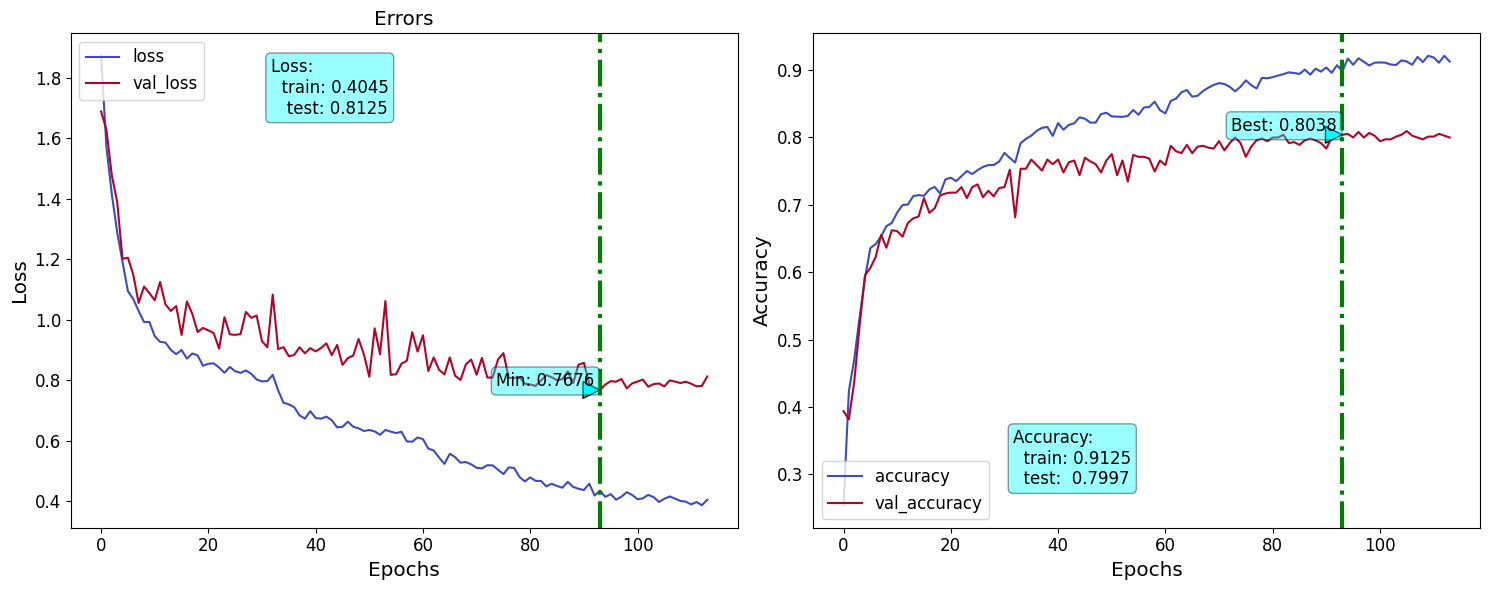

In [20]:
fn_plot_tf_hist(loss_df)